In [158]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from scipy.optimize import curve_fit




In [159]:


power = np.array([533.3454, 739.0872, 971.4638,1126.938,1185.5,1086.293,807.3831,565.6768,399.1143,296.0794,245.7076])
offset = np.array([5,4,3,2,1,0,-1,-2,-3,-4,-5])
peak = 1185.5





Text(0, 0.5, 'Power')

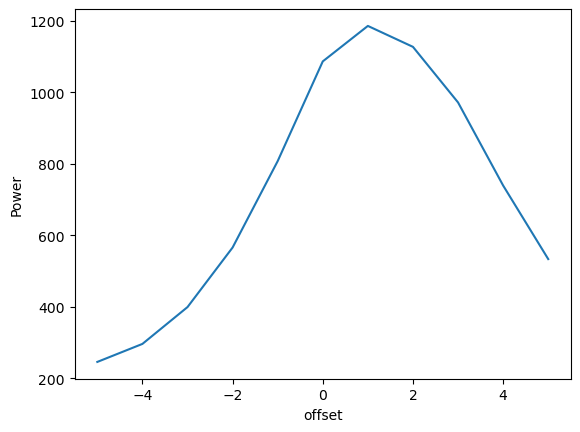

In [160]:

fig, ax = plt.subplots()

plt.plot(offset,power)
ax.set_xlabel('offset')
ax.set_ylabel('Power')



In [161]:


peak = np.max(power)
print(peak)
half = np.max(power)/2
print(half)

FWHM = np.where(power == 592.75)
print(FWHM)

1185.5
592.75
(array([], dtype=int64),)


In [162]:

closest_indices = np.abs(power - peak/2).argmin()
closest_indices




7

In [174]:
#Using Curve_fit

#define a function to fit to the curve
def gaussian(x, amp, mean, std, sky):
    return amp * np.exp(-.5*((x-mean)**2)/((std)**2)) + sky

#define what amp etc are as initial guesses for the gaussian fit to make it more accurate
sky = 200
amp = np.max(power)
mean = 1.5
std1 = 4.5

print(amp)


1185.5


uncertainty: 0.164916681069387
FWHM: 5.603687071516618


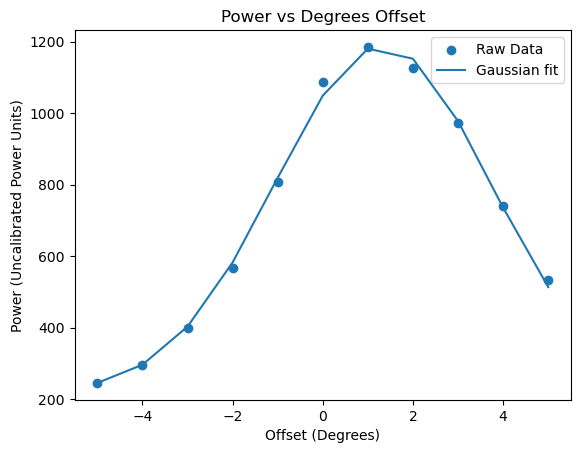

In [175]:

#use the curve fit function and assign the tuple to somethings
optimal_parameters, covariance_parameters = curve_fit(gaussian, offset, power, p0 =[amp, mean, std1, sky], maxfev=10000 )

#Extract the values of amp etc to be used while graphing to pass throguh the independent variable (power)
amp, mean, std_new2, sky = optimal_parameters

#Extract the values of variance of each variable and covariance between variables to be used later on in uncertainty calculations
# by taking it from the 2D 2x2 matrix array of covariance parameters
# variance for is diagonal
amp_var = covariance_parameters[0,0]
mean_var = covariance_parameters[1,1]
std_var = covariance_parameters[2,2]
sky_var = covariance_parameters[3,3]

#print(std_var)
std_unc1 = np.sqrt(std_var) * 2.355
print(str('uncertainty: ') + str(std_unc1))
#covariance for each is 'offdiagonal'
cov_a_m = covariance_parameters[0,1]
cov_a_s = covariance_parameters[0,2]
cov_s_m = covariance_parameters[1,2]





plt.figure()
plt.scatter(offset,power, label='Raw Data')
plt.plot(offset, gaussian(offset, *optimal_parameters), label= 'Gaussian fit')
plt.xlabel('Offset (Degrees)')
plt.ylabel('Power (Uncalibrated Power Units)')# what are the units? watts?
plt.title( 'Power vs Degrees Offset')
plt.legend()

#calculate the FWHM using the gaussian:
FWHM1= 2 * np.sqrt(2*np.log(2)) * std_new2
print (str('FWHM: ')+ str(FWHM1))


In [165]:
#calculate the FHWM using the gaussian:
FWHM1= 2.355* std_new2
print (str('FWHM: ')+ str(FWHM1))

FWHM: 5.604115304381228


Text(0.5, 1.0, 'Peak Antenna Temperature as a Function of Galactic Latitude')

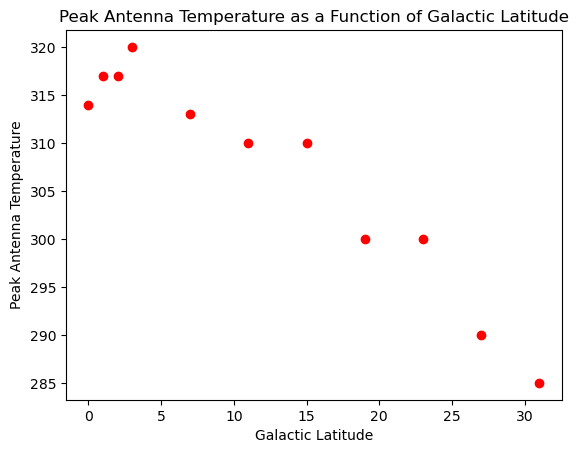

In [166]:
#part 3
# plot Make a plot of peak antenna temperature as a function of galactic latitude,
#    extending to both positive and negative galactic latitudes. Is the HI emission from a thin disk?
#g_lat = np.array([-31, -27, -23, -19, -15, -11, -7, -3, -2, -1, 0, 1, 2, 3, 7, 11, 15, 19, 23, 27, 31])
#temp = np.array([285,290, 300, 300, 310, 310, 313, 320, 317, 317, 314, 317, 317, 320, 313, 310, 310, 300, 300, 290, 285])
g_lat = np.array([0, 1, 2, 3, 7, 11, 15, 19, 23, 27, 31])
temp = np.array([314, 317, 317, 320, 313, 310, 310, 300, 300, 290, 285])
#g_lat = np.array([-31, -27, -23, -19, -15, -11, -7, -3, 3, 7, 11, 15, 19, 23, 27, 31])
#temp = np.array([285,290, 300, 300, 310, 310, 313, 320, 320, 313, 310, 310, 300, 300, 290, 285])
#

plt.figure()
plt.plot(g_lat, temp, 'ro')
plt.xlabel('Galactic Latitude')
plt.ylabel('Peak Antenna Temperature')
plt.title( 'Peak Antenna Temperature as a Function of Galactic Latitude')
#plt.legend()


uncertainty: 4.394526309466954
FWHM: 31.057683130099868


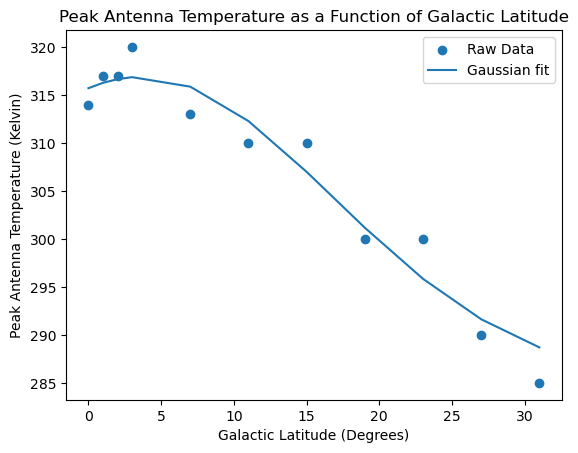

In [172]:

#Using Curve_fit

#define a function to fit to the curve
def gaussian(x, amp, mean, std):
    return amp * np.exp(-.5*((x-mean)**2)/((std)**2))+ 285

#define what amp etc are as initial guesses for the gaussian fit to make it more accurate

amp = np.max(temp)-285
mean = 0
std2 = np.std(g_lat)
#print(std2)

#print(amp)

#use the curve fit function and assign the tuple to somethings
optimal_parameters, covariance_parameters = curve_fit(gaussian, g_lat, temp, p0 =[amp, mean, std], maxfev=10000, sigma=np.zeros(len(temp))+2 )

#Extract the values of amp etc to be used while graphing to pass throguh the independent variable (power)
amp, mean, std_new = optimal_parameters
#print(str(std_new) + str('stuff'))

#Extract the values of variance of each variable and covariance between variables to be used later on in uncertainty calculations
# by taking it from the 2D 2x2 matrix array of covariance parameters
# variance for is diagonal
amp_var = covariance_parameters[0,0]
mean_var = covariance_parameters[1,1]
std_var1 = covariance_parameters[2,2]
#print(std_var1)
# uncertainty
std_unc2= np.sqrt(std_var1) * 2.355
print(str('uncertainty: ') + str(std_unc2))

#covariance for each is 'offdiagonal'
cov_a_m = covariance_parameters[0,1]
cov_a_s = covariance_parameters[0,2]
cov_s_m = covariance_parameters[1,2]



plt.figure()
plt.scatter(g_lat,temp, label='Raw Data')
plt.plot(g_lat, gaussian(g_lat, *optimal_parameters), label= 'Gaussian fit')
plt.xlabel('Galactic Latitude (Degrees)')
plt.ylabel('Peak Antenna Temperature (Kelvin)')
plt.title( 'Peak Antenna Temperature as a Function of Galactic Latitude')
plt.legend()


#plt.figure()
#plt.scatter(g_lat,power, label='raw data')
#plt.plot(g_lat, gaussian(g_lat, *optimal_parameters), label= 'Gaussian fit')
#plt.xlabel('Offset (degrees)')
#plt.ylabel('Power')# what are the units? watts?
#plt.title( 'degrees offset vs power')
#plt.legend()

#calculate the FHWM using the gaussian:
FWHM2 = 2 * np.sqrt(2*np.log(2)) * std_new
print (str('FWHM: ')+ str(FWHM2))
#print(optimal_parameters)

In [168]:
AQ = np.sqrt(((FWHM1)*std_unc1)+ ((FWHM2)*std_unc2))
print(AQ)

11.722116605913822


In [176]:
thick = np.sqrt(FWHM2**2 - FWHM1**2)
print(FWHM2)
print(FWHM1)
print(thick)

31.057683130099868
5.603687071516618
30.547968387671993


In [170]:
Unc_bfr_sig = np.sqrt(std_var)
print(str('uncertainty of SRTbeam: ' + str(std_unc1)))
print(std_unc2)
print(Unc_bfr_sig)

uncertainty of SRTbeam: 0.164916681069387
4.394526309466954
0.07002831467914522
